# Assignment 9, Analyze gold prices over time 
## Author: Jonathan Heard
## Class: CIS256DA

## Data for this assignment is in gold.cvs

Tasks

 1. Read the data from the CSV file into a DataFrame called gold (2 pts.).
 2. Run the info() method, and note the data types of the two columns (2 pts.).
 3. Convert the Date column to the DateTime data type. Then, display the first five rows of data, 
    and note that the dates are for the first of each month starting in 1950 (3 pts.).
 4. Plot the data with a Pandas line plot (2 pts.).
 5. Index the data on the Date column. Then, generate time periods for the first day of each year from 1950 to 2020 (3 pts.).
 6. Reindex the data using the new time periods, and display the first five rows again to see that there is just one row for each year (2 pts.).
 7. Plot the reindexed data with a Pandas line plot (2 pts.).
 8. Resample the data to a quarterly frequency and plot the data again (2 pts.).
 9. Resample the data to a yearly frequency and plot the data one more time (2 pts.).
10. Plot the rolling mean for the data using a Pandas line plot (2 pts.). 
    Experiment with two different values for the window parameter, include each different window value plot in a separate cell (4 pts.).

After completing the assignment, please submit your .ipynb file.Chapter 3 Asignment



## Import required modules

In [1]:
# Import the modules needed for this project.

# Import pandas and assign the alias pd
import pandas as pd


# Tasks list

In [2]:
# Task 01 Read the data from the CSV file into a DataFrame called gold.

gold = pd.read_csv("gold.csv")

# Display the first five rows, just to see what is in the data.

gold.head(5)


,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [3]:
# Task 02 Run the info() method, and note the data types of the two columns (2 pts.).

gold.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 59.7 KB


In [4]:
# Task 03 Convert the Date column to the DateTime data type. Then, display the first five rows of data, 
#         and note that the dates are for the first of each month starting in 1950.

gold.Date = gold.Date.apply(pd.to_datetime, format = '%Y-%m')

gold.head()


,Date,Price
0,1950-01-01,34.73
1,1950-02-01,34.73
2,1950-03-01,34.73
3,1950-04-01,34.73
4,1950-05-01,34.73


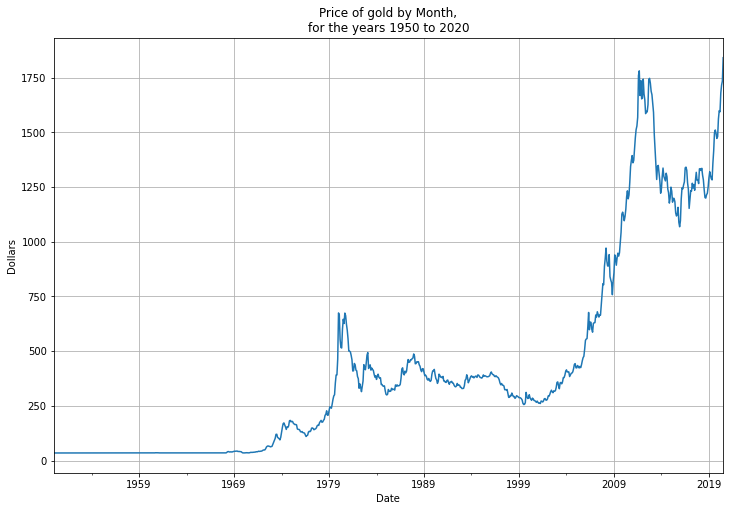

In [5]:
# Task 04 Plot the data with a Pandas line plot.

gold.plot.line(title = 'Price of gold by Month,\nfor the years 1950 to 2020',
                   grid = True, x = 'Date', y = 'Price',
                    ylabel = 'Dollars', 
                    figsize = (12, 8), legend = False);


In [6]:
# Task 05 Index the data on the Date column. Then, generate time periods for the first day of each year from 1950 to 2020.

gold.set_index('Date', inplace = True)

year_start = pd.date_range('01/01/1950', '12/01/2020', freq = 'YS')


In [7]:
# Task 06 Reindex the data using the new time periods, and display the first five rows again to see that there is just one row for each year.

gold_by_year = gold.reindex(year_start)

gold_by_year.head()

,Price
1950-01-01,34.73
1951-01-01,34.72
1952-01-01,34.49
1953-01-01,34.88
1954-01-01,34.86


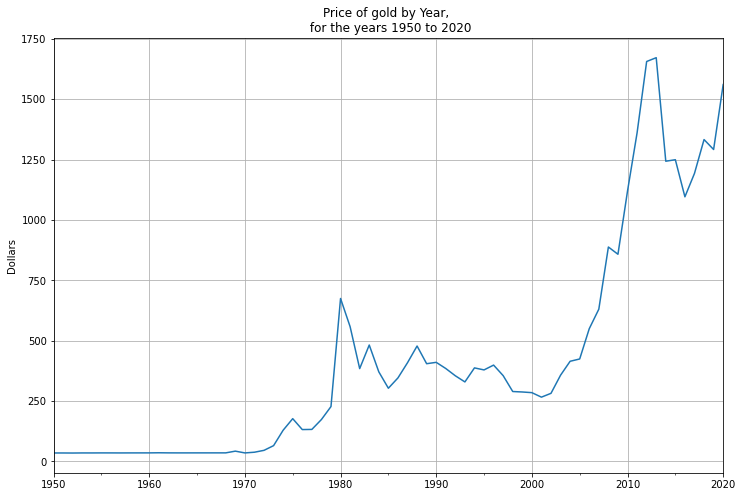

In [8]:
# Task 07 Plot the reindexed data with a Pandas line plot.

gold_by_year.plot.line(title = 'Price of gold by Year, \n for the years 1950 to 2020',
                   grid = True, y = 'Price',
                    ylabel = 'Dollars', 
                    figsize = (12, 8), legend = False);

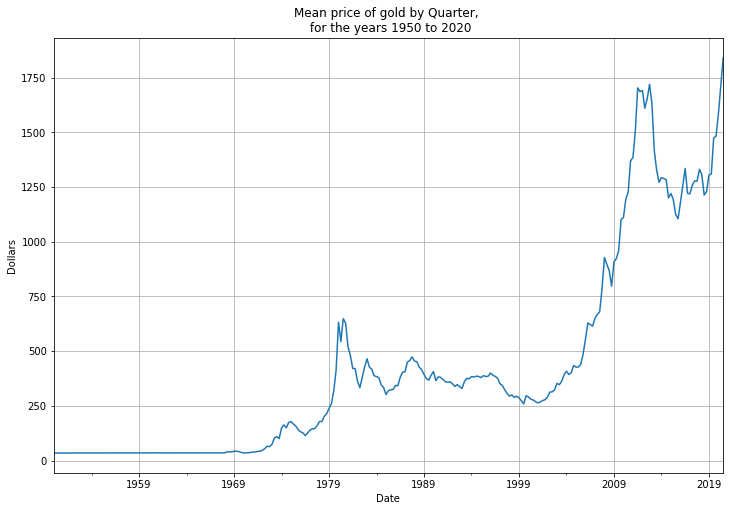

In [9]:
# Task 08 Resample the data to a quarterly frequency and plot the data again.

# This is what I first tried; but found the resample() method could be used directly
#         instead of creating the new DataFrame.
#
# gold_quarterly = gold.resample(rule = 'QS').mean()

gold.resample(rule = 'QS').mean().plot.line(
                        title = 'Mean price of gold by Quarter, \n for the years 1950 to 2020', 
                              grid = True, y = 'Price', ylabel = 'Dollars', 
                              figsize = (12, 8), legend = False);
    

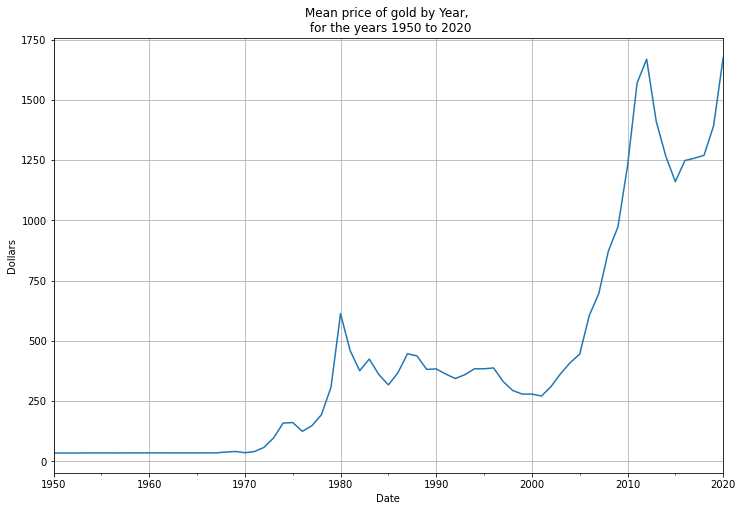

In [10]:
# Task 09 Resample the data to a yearly frequency and plot the data one more time.

gold.resample(rule = 'YS').mean().plot.line(
                        title = 'Mean price of gold by Year, \n for the years 1950 to 2020',
                              grid = True, y = 'Price', ylabel = 'Dollars', 
                              figsize = (12, 8), legend = False);


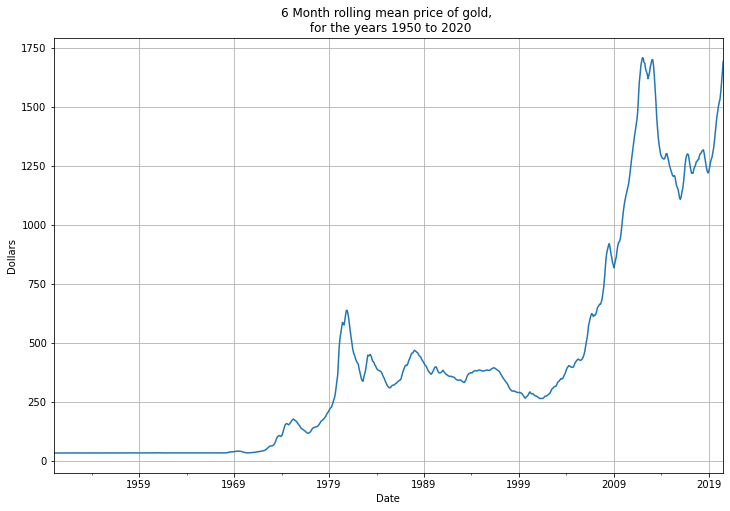

In [11]:
# Task 10 Plot the rolling mean for the data using a Pandas line plot (2 pts.). 
#         Experiment with two different values for the window parameter, include each different window value plot in a separate cell (4 pts.).

# There was no reason to create a new DataFrame for each use of the rolling() method.

gold.rolling(window = 6, min_periods = 1).mean().plot.line(
                        title = '6 Month rolling mean price of gold, \n for the years 1950 to 2020',
                              grid = True, y = 'Price', ylabel = 'Dollars', 
                              figsize = (12, 8), legend = False);


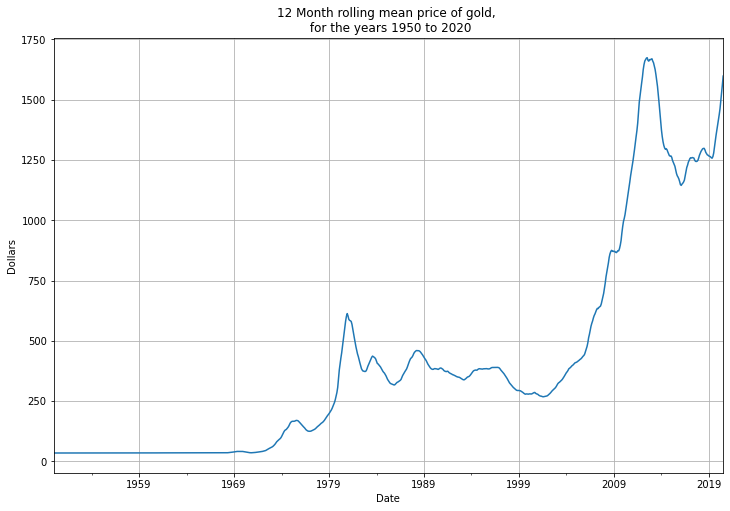

In [12]:
# Task 10a - 1st Experimental window parameter, with plot.

gold.rolling(window = 12, min_periods = 1).mean().plot.line(
                        title = '12 Month rolling mean price of gold, \n for the years 1950 to 2020',
                              grid = True, y = 'Price', ylabel = 'Dollars',
                              figsize = (12, 8), legend = False);



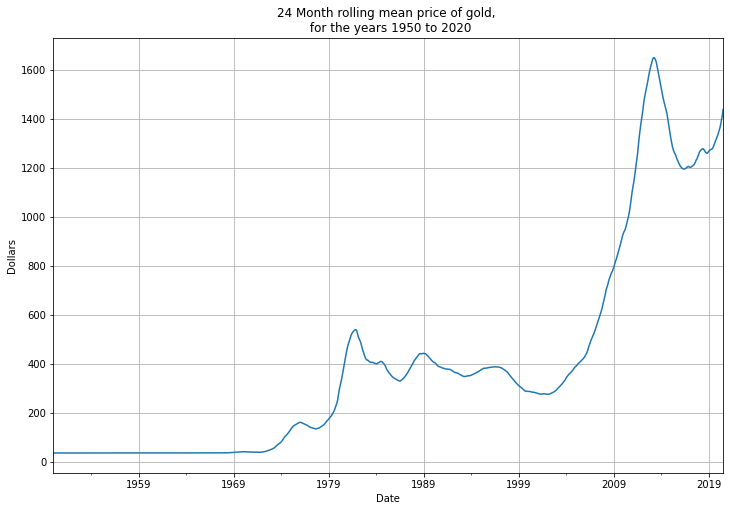

In [13]:
# Task 10b - 2nd Experimental window parameter, with plot.

gold.rolling(window = 24, min_periods = 1).mean().plot.line(
                        title = '24 Month rolling mean price of gold, \n for the years 1950 to 2020',
                            grid = True, y = 'Price', ylabel = 'Dollars', 
                            figsize = (12, 8), legend = False);
